In [256]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

import torchvision
from torchvision import transforms
import torch
from torch.utils import data
from torch.utils.data import Dataset, DataLoader
from torch.nn import functional as F
from torch import nn

from PIL import Image

## Import data

In [5]:
train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train.shape, test.shape

((60000, 785), (10000, 785))

In [29]:
train_tns = torch.from_numpy(train.values)
test_tns = torch.from_numpy(test.values)

In [30]:
train_tns.shape, test_tns.shape

(torch.Size([60000, 785]), torch.Size([10000, 785]))

In [240]:
train_features = train_tns[:, 1:].type(torch.FloatTensor)/255
test_features = train_tns[:, 1:].type(torch.FloatTensor)/255
train_features.shape, test_features.shape

(torch.Size([60000, 784]), torch.Size([60000, 784]))

In [33]:
train_labels = train_tns[:, 0]
test_labels = test_tns[:, 0]
train_labels.shape, test_labels.shape

(torch.Size([60000]), torch.Size([10000]))

## Build dataset and dataloader

In [198]:
class fashionMNISTDataset(Dataset):
    
    def __init__(self, features, labels, plot=True):
        self.images = features
        self.labels = labels
        self.plot = plot
        
    def __len__(self):
        return len(self.images)
        
    def __getitem__(self, idx):
        image = self.images[idx, :]
        label = self.labels[idx]
        #sample = {'image': image, 'label': label}
        sample = (image, label)
        if self.plot:
            plt.imshow(self.images[idx].reshape(28, 28), cmap='gray')
            plt.title(get_label(self.labels[idx]))
        return sample

In [190]:
def get_label(label):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[i] for i in label]

In [191]:
get_label([1,2,3])

['trouser', 'pullover', 'dress']

In [241]:
train_ds = fashionMNISTDataset(train_features, train_labels, plot=False)
test_ds = fashionMNISTDataset(test_features, test_labels, plot=False)

In [265]:
train_length=int(0.8* len(train_ds))
test_length=len(train_ds)-train_length

train_dataset,valid_dataset=torch.utils.data.random_split(train_ds,(train_length,test_length))

In [266]:
batch_size = 50

train_dl = data.DataLoader(train_dataset, batch_size=batch_size)
valid_dl = data.DataLoader(valid_dataset, batch_size=batch_size)
test_dl = data.DataLoader(test_ds, batch_size = batch_size)

In [267]:
def show_images(images, num_rows, num_cols, titles=None, scale=1.5):
    figsize = (num_cols * 1.5, num_rows * 1.5)
    figure, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    figure.tight_layout()
    for i, (ax, images) in enumerate(zip(axes, images)):
        ax.imshow(np.array(images), cmap='gray')
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

In [248]:
X, y = next(iter(train_dl))

In [249]:
X.shape, y.shape

(torch.Size([50, 784]), torch.Size([50]))

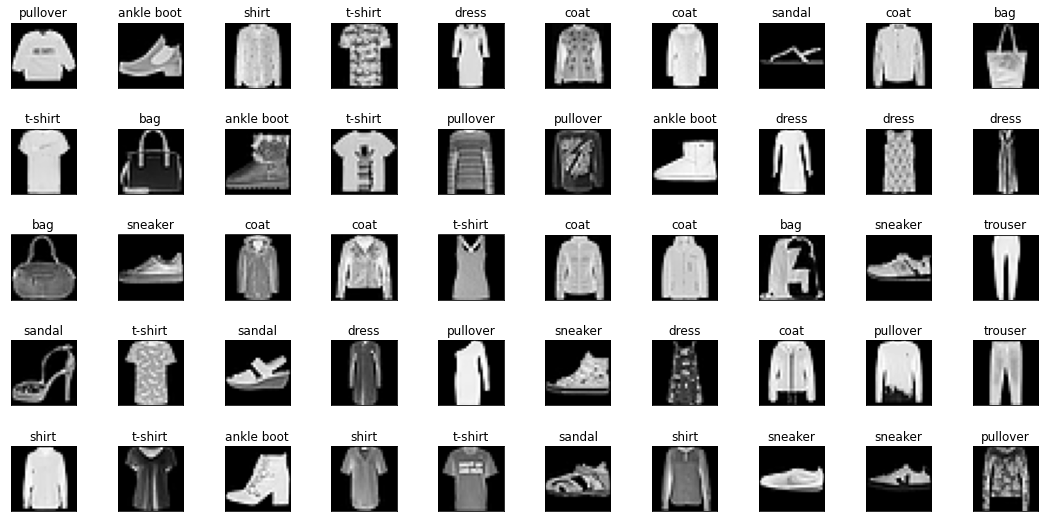

In [254]:
show_images(X.reshape(batch_size, 28,28), 5, 10, titles=get_label(y));

## Build model

In [257]:
class NN(nn.Module):
    
    def __init__(self, in_dim, hidden_dim, out_dim):
        super().__init__()
        net = nn.Sequential(
        nn.Linear(in_dim, hidden_dim), 
        nn.ReLU(),
        nn.Linear(hidden_dim, out_dim))
        
    def forward(self, X):
        return net(X)

In [ ]:
def train(net, train_dl, valid_dl, num_epochs, learning_rate, weight_decay, batch_size):
    
    train_loss, valid_loss = [], []
    X, y = next(iter(train_dl))
    
        
        for epoch in range(num_epochs):

In [258]:
loss = nn.CrossEntropyLoss()

In [260]:
in_dim, hidden_dim, out_dim = 784, 100, 10
net = NN(in_dim, hidden_dim, out_dim)

NN()
